In [2]:
import pandas as pd

df=pd.read_csv('d:/data/iris/iris2.csv')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Result
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [4]:
df['Result'].value_counts() #이미 샘플링이 된 데이터셋

2    50
1    50
0    50
Name: Result, dtype: int64

In [5]:
cols=['sepal length (cm)',
      'sepal width (cm)',
      'petal length (cm)',
      'petal width (cm)']
X=df[cols]
y=df['Result']

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                              stratify=y,random_state=10)

In [9]:
#SVM모형(기본옵션)
from sklearn.svm import SVC
model=SVC(random_state=10)
model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=10, shrinking=True, tol=0.001,
    verbose=False)

In [10]:
#예측정확도
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.975
1.0


최적의 C: 0.001
최적의 gamma: 0.0001
최적의 정확도: 1.0


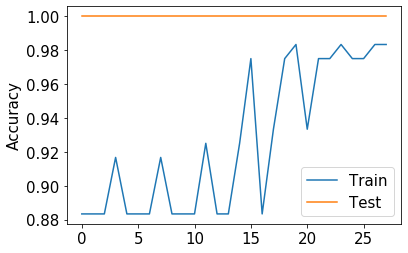

In [16]:
#최적의 cost,gamma를 찾는과정
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
train_rate=[]
test_rate=[]
c_values=[0.001,0.01,0.1,1,10,100,1000]
gamma_values=[0.0001,0.001,0.01,0.1] 
for n in c_values:
    for g in gamma_values:
        model=SVC(C=n,gamma=g,random_state=10) #SVM 모형
        model.fit(X_train,y_train) #기계학습
        train_rate.append(
            [n,g,model.score(X_train,y_train)]) #학습용 정확도 리스트에 추가
        
        test_rate.append(
            [n,g,model.score(X_test,y_test)]) #검증용 정확도 리스트에 추가
        
train_arr=np.array(train_rate) #리스트를 넘파이 배열로 변환
test_arr=np.array(test_rate)
max_rate=np.max(test_arr[:,2]) #배열의 최대값
idx=np.where(test_arr==max_rate)[0][0] #최대값의 위치를 구함
print('최적의 C:',test_rate[idx][0])
print('최적의 gamma:',test_rate[idx][1])
print('최적의 정확도:',test_rate[idx][2])
plt.rcParams['font.size']=15
plt.plot(range(len(train_rate)),train_arr[:,2],label='Train')
plt.plot(range(len(test_rate)),test_arr[:,2],label='Test')
plt.ylabel('Accuracy')
plt.legend()

In [18]:
model=SVC(random_state=10,C=0.001,gamma=0.0001)
model.fit(X_train,y_train)

SVC(C=0.001, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=10, shrinking=True, tol=0.001,
    verbose=False)

In [19]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.8833333333333333
1.0
